
=== Fitting MCR to 3 cubes ===
Excitations: ['320.0', '340.0', '350.0']
Analyzing cube structure: (256, 348, 22)
  Format: bands_last
  Spatial dimensions: (256, 348)
  Spectral bands: 22
  Total pixels: 89088
  Unfolded to: (89088, 22)
  Data range: [0.000000, 1795.760406]
Analyzing cube structure: (256, 348, 22)
  Format: bands_last
  Spatial dimensions: (256, 348)
  Spectral bands: 22
  Total pixels: 89088
  Unfolded to: (89088, 22)
  Data range: [0.000000, 1166.626972]
Analyzing cube structure: (256, 348, 24)
  Format: bands_last
  Spatial dimensions: (256, 348)
  Spectral bands: 24
  Total pixels: 89088
  Unfolded to: (89088, 24)
  Data range: [0.000000, 952.227094]
Combined data shape: (89088, 68)
Total spectral bands: 68

Fitting MCR model:
  Data matrix: (89088, 68)
  Components: 3
SVD initialization successful
  Explained variance ratio: [0.8350912  0.03409054 0.02910641]
  Total explained variance: 0.8983
  Iteration 0: MSE = 654.827760
  Iteration 1: MSE = 543.508014
  Iter

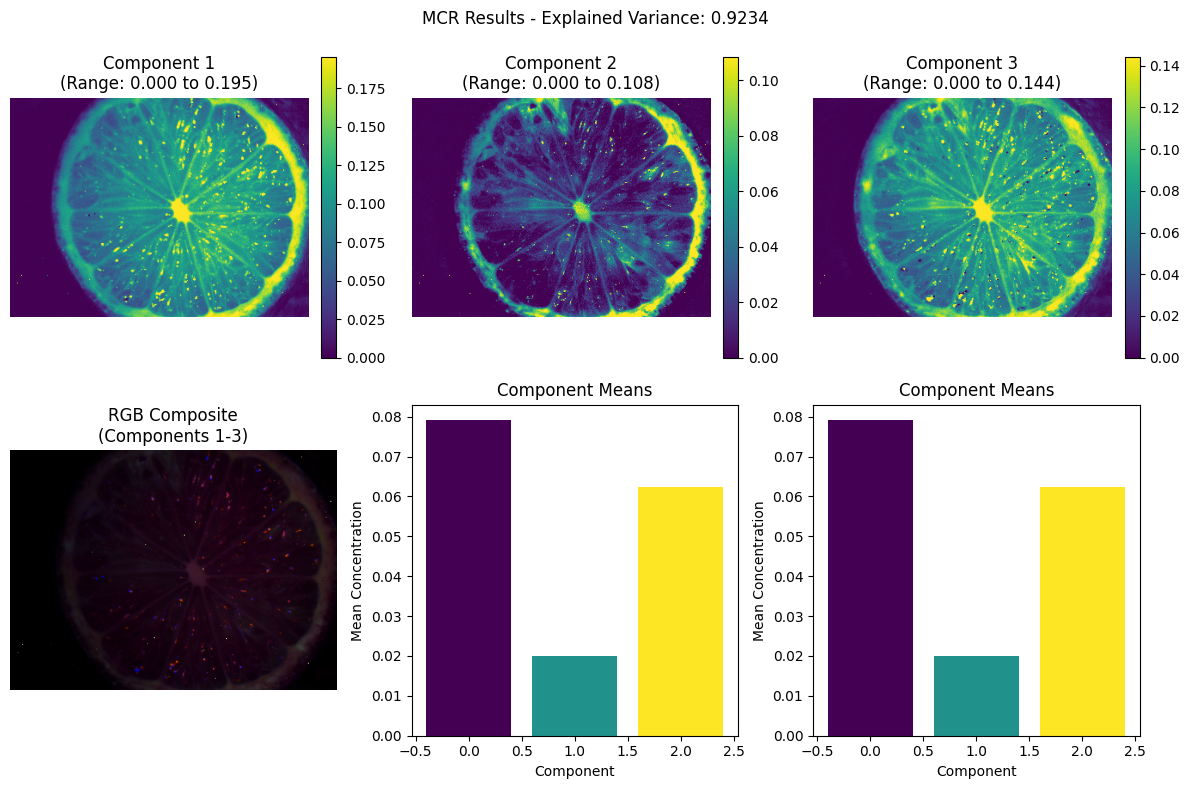

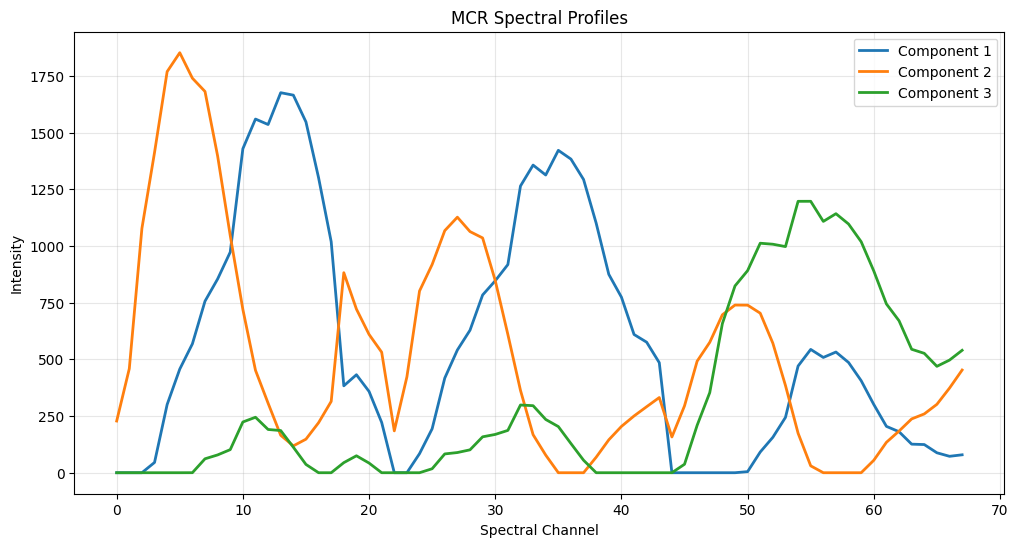


=== MCR Results Summary ===
Explained variance: 0.9234
Reconstruction error: 477.583305
Concentration maps shape: (256, 348, 3)
Component value ranges:
  Component 1: [0.000000, 1.000000] (mean: 0.079043, std: 0.057365)
  Component 2: [0.000000, 1.000000] (mean: 0.019911, std: 0.029479)
  Component 3: [0.000000, 1.000000] (mean: 0.062239, std: 0.046573)


In [1]:
# Test with the fixed implementation
from mcr_als import FixedUltraRobustMCR
import pickle
# Load your data
with open(r"C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl", 'rb') as f:
    data_dict = pickle.load(f)

# Test problematic triplet
selected_excitations = ['320.0', '340.0', '350.0']
cubes = {ex: data_dict['data'][ex]['cube'] for ex in selected_excitations if ex in data_dict['data']}

# Use fixed MCR
fixed_mcr = FixedUltraRobustMCR(
    n_components=3,
    method='nnls',
    normalize_components=True,  # This will fix the scaling issues
    max_iter=20,
    verbose=True
)

results = fixed_mcr.fit_multiple_cubes(cubes)
fixed_mcr.visualize_results(results, output_dir='results/fixed_mcr_test',
                           filename_prefix='triplet_fixed')

In [ ]:
from mcr_als import UltraRobustMCR
import pickle
# Test the problematic triplet with ultra-robust MCR

with open(r"C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl", 'rb') as f:
    data_dict = pickle.load(f)
selected_excitations = ['320.0', '340.0', '350.0']
cubes = {ex: data_dict['data'][ex]['cube'] for ex in selected_excitations if ex in data_dict['data']}

# Use ultra-robust MCR
ultra_mcr = UltraRobustMCR(
    n_components=3,
    method='nnls',  # Use Non-Negative Least Squares
    alpha=0.01,     # Add regularization
    max_iter=30,    # Fewer iterations
    tol=1e-4,       # Relaxed tolerance
    verbose=True
)

results = ultra_mcr.fit_multiple_cubes(cubes)
ultra_mcr.visualize_results(results, output_dir='results/ultra_robust_test',
                           filename_prefix='triplet_ultra_robust')

In [ ]:
from mcr_als import RobustHyperspectralMCR
import pickle

# Load your data
with open(r"C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl", 'rb') as f:
    data_dict = pickle.load(f)

# Test with triplets using robust MCR
selected_excitations = ['320.0', '340.0', '350.0']  # Your problematic triplet
cubes = {ex: data_dict['data'][ex]['cube'] for ex in selected_excitations if ex in data_dict['data']}

# Use robust MCR with better settings
robust_mcr = RobustHyperspectralMCR(
    n_components=3,  # Try fewer components first
    non_negativity=True,
    data_preprocessing='standard',  # Enable preprocessing
    regularization=1e-4,  # Add regularization
    max_iter=50,  # Fewer iterations initially
    verbose=True
)

# Run analysis
results = robust_mcr.fit_multiple_cubes(cubes)

# Visualize results
robust_mcr.visualize_results(results, output_dir='results/robust_mcr_test',
                            filename_prefix='triplet_test')

In [ ]:
from mcr_als import HyperspectralMCRCombinations
import pickle

# Initialize the enhanced MCR class
mcr_combo = HyperspectralMCRCombinations(n_components=4, non_negativity=True)

# Load your data
with open(r"C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl", 'rb') as f:
    data_dict = pickle.load(f)

# Get available excitation wavelengths
available_excitations = list(data_dict['data'].keys())
print(f"Available excitations: {available_excitations}")

# Generate automatic combinations
combinations_dict = mcr_combo.generate_combinations(
    excitation_list=available_excitations[:6],  # Use first 6 excitations
    combination_types=['single', 'pairs', 'triplets']
)

# Add custom combinations
custom_combinations = {
    'low_wavelengths': ['450.0', '470.0', '490.0'],
    'high_wavelengths': ['550.0', '570.0', '590.0'],
    'alternating': ['450.0', '510.0', '570.0'],
    'specific_pair': ['480.0', '540.0']
}

combinations_dict = mcr_combo.add_custom_combinations(combinations_dict, custom_combinations)

print(f"Total combinations to analyze: {len(combinations_dict)}")

# Run analysis on all combinations
results = mcr_combo.analyze_combinations(
    data_dict=data_dict,
    combinations_dict=combinations_dict,
    output_dir='results/mcr_combinations_analysis',
    save_individual_results=True
)

# Compare specific combinations
mcr_combo.compare_combinations(
    combinations_to_compare=['custom_low_wavelengths', 'custom_high_wavelengths', 'custom_alternating'],
    output_dir='results/mcr_detailed_comparison'
)

In [ ]:
from mcr_als import HyperspectralMCR
with open(r'C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# Extract a single cube
ex_wavelength = '450.0'  # example excitation wavelength
cube = data_dict['data'][ex_wavelength]['cube']

# Run MCR analysis
mcr = HyperspectralMCR(n_components=3, non_negativity=True)
results = mcr.fit_single_cube(cube, excitation=ex_wavelength)

# Visualize results
mcr.visualize_results(results, output_dir='results/mcr_analysis', filename_prefix='lime_ex450')

In [ ]:
# Load your data
with open(r"C:\Users\meloy\PycharmProjects\Capstone\data\processed\Lime\data_cutoff_40nm_exposure_max_power_min.pkl", 'rb') as f:
    data_dict = pickle.load(f)

# Extract multiple cubes
selected_excitations = ['450.0', '490.0', '530.0']
cubes = {ex: data_dict['data'][ex]['cube'] for ex in selected_excitations if ex in data_dict['data']}

# Run MCR analysis on multiple cubes simultaneously
mcr = HyperspectralMCR(n_components=4, non_negativity=True)
results = mcr.fit_multiple_cubes(cubes)

# Visualize results
mcr.visualize_results(results, output_dir='results/mcr_analysis', filename_prefix='lime_multi')